0 error: 5.378099689729537e-09 D 2000000000.0


/home/ekrem/Ekrem/chandrasekhar_solver.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [y[1] , (-2/t)*y[1] - (y[0]**2 - (1/y_c**2))**(3/2)]


1 error: 1.5569215006333243e-06 D 1990000000.0
2 error: 1.4115043246160644e-06 D 1980000000.0
3 error: 1.2463700180978479e-06 D 1970000000.0
4 error: 1.3776459999375008e-06 D 1960000000.0
5 error: 1.303746634448584e-06 D 1950000000.0
6 error: 9.404673314906034e-07 D 1940000000.0
7 error: 8.367924310967327e-07 D 1930000000.0
8 error: 7.453437931249315e-07 D 1920000000.0
9 error: 6.476722214288424e-07 D 1910000000.0
10 error: 5.617006055875795e-07 D 1900000000.0
11 error: 5.547926550566573e-07 D 1890000000.0
12 error: 4.752868579832936e-07 D 1880000000.0
13 error: 3.4043629075293255e-07 D 1870000000.0
14 error: 3.640189857365067e-07 D 1860000000.0
15 error: 3.370076035187555e-07 D 1850000000.0
16 error: 2.4281731316789013e-07 D 1840000000.0
17 error: 1.4830577553042543e-07 D 1830000000.0
18 error: 1.3824303455488942e-07 D 1820000000.0
19 error: 9.958939998884941e-08 D 1810000000.0
20 error: 7.037712004925725e-08 D 1800000000.0
21 error: 3.945294706457177e-08 D 1790000000.0
22 error: 1.59

<Figure size 432x288 with 0 Axes>

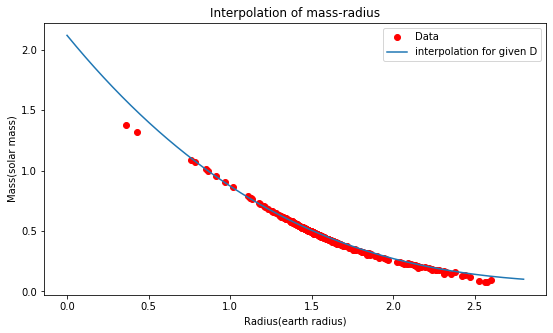

In [156]:
import numpy as np
import chandrasekhar_solver as ch
import Functions as F
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

### DATA ### 
M,logg = F.data_reader()
M,R = F.scaler(M,logg)

### inital guess ###
max_iter = 100
D = 2e9
dD = 1e7
rho_c = np.linspace(10**10,10**7,20)
tol = 1e-8

### CONSTANTS(SI) ###
K = 3161125.6038212245 #theoratical value
G = 6.67408e-11
solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m

zeta_n = 0 ## when the solution reaches surface value.
zeta_prime_n = 0 ## when the derivative reaches the surface
Radius = 0
Mass = 0
R_new = [] ## for storing new radius and mass
M_new = []

for i in range(max_iter):
        
    print(i,"error:",error,"D",D)
    #D or rho_c dependent variables
    C = (5/8)*K*(D**(5/3))
    for rho in rho_c:
        ### solve the chandrasekhar for given rho and D ###
        sol,surface = ch.solve_chan(D,rho,limit=8.2,met='RK45')
        ##### find the surface #####
        for j in range(len(sol.t)):
            if (sol.y[0,j] <= surface):
                zeta_n = sol.t[j]
                zeta_prime_n = sol.y[1,j]
            elif(sol.y[0,-1]> surface):
                zeta_n = sol.t[-1]
                zeta_prime_n = sol.y[1,-1]
                


        #############################
        ### For Radius ###
        y_c = np.sqrt(rho/D + 1)
        Beta = np.sqrt((2*C)/(np.pi*G))/(D*y_c) ## scale factor of radius
        Radius = (Beta*zeta_n)
        ### For Mass ###
        Mass = 4*np.pi*(Radius**3)*D*(y_c**3)*(-zeta_prime_n/zeta_n)
        Mass = Mass/solar_mass
        Radius = Radius/earth_radius
        ## add them to array
        R_new.append(Radius)
        M_new.append(Mass)
    R_new = np.array(R_new)
    M_new = np.array(M_new)
    spl = UnivariateSpline(R_new, M_new)
    R_new = []
    M_new = []
    
    ### calculate error
    error = 0
    for l in range(len(R)):
        error = error + (M[l]-spl(R[l]))**2
        error = error/(len(R))

    if (error < tol):
        print("D is :",D,"with error: ", error,"corresponding C is: ", C)
        x = np.linspace(0,2.8,500)
        plt.figure()
        fig, axis = plt.subplots(figsize = (9,5))
        plt.plot(R,M,'ro',x,spl(x))
        plt.title("Interpolation of mass-radius")
        plt.xlabel("Radius(earth radius)")
        plt.ylabel("Mass(solar mass)")
        plt.gca().legend(('Data','interpolation for given D'), loc='upper right')
        break;
        
    """CHECK FIT look if D is okay, if not update it """
    if (sum(M)-sum(spl(R))<0):
        D = D - dD
    else:
        D = D + dD      
        
        